# Problem Statement
A client has put several of their employees through some  assessments. Their scores are in one of the attached files.

The client has also provided us with performance ratings of the employees using three categories, A, B and C, where A is highest and C is lowest. This data is in the other attached file

- Determine what the relationships are (if any) between the  scores and the performance ratings. Produce a summary of your findings for the client.

- If possible, build a predictive model of the performance ratings using  scores. The client may want to use such a model in their recruitment process. Produce a summary of your modelling process and any resulting models.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading account attribute
account_attribute = pd.read_csv("account attribute score.csv")
account_attribute.head()

,AccountId,Area,Dimension,Attribute,Assessment,AssessmentVersion,MainScore,MainScoreType,Percentile,Percentage,STEN
0,0,Behaviour,Control Strategy,Control,VentureView,Venture View V1,60.27,Percentage,7,60.27,3
1,0,Behaviour,Control Strategy,Control (Scenario1),VentureView,Venture View V1,67.86,Percentage,22,67.86,4
2,0,Behaviour,Control Strategy,Control (Scenario2),VentureView,Venture View V1,62.50,Percentage,27,62.50,4
3,0,Behaviour,Control Strategy,Control (Scenario3),VentureView,Venture View V1,55.36,Percentage,7,55.36,3
4,0,Behaviour,Control Strategy,Control (Scenario4),VentureView,Venture View V1,55.36,Percentage,4,55.36,2


In [3]:
# Loading account group
account_group = pd.read_csv("account group.csv")
account_group.head()

,AccountId,Group
0,0,B
1,1,C
2,2,C
3,3,A
4,4,A


In [4]:
## Merging two files
data=pd.merge(account_attribute,account_group,how="inner",on="AccountId")
data.head()

,AccountId,Area,Dimension,Attribute,Assessment,AssessmentVersion,MainScore,MainScoreType,Percentile,Percentage,STEN,Group
0,0,Behaviour,Control Strategy,Control,VentureView,Venture View V1,60.27,Percentage,7,60.27,3,B
1,0,Behaviour,Control Strategy,Control (Scenario1),VentureView,Venture View V1,67.86,Percentage,22,67.86,4,B
2,0,Behaviour,Control Strategy,Control (Scenario2),VentureView,Venture View V1,62.50,Percentage,27,62.50,4,B
3,0,Behaviour,Control Strategy,Control (Scenario3),VentureView,Venture View V1,55.36,Percentage,7,55.36,3,B
4,0,Behaviour,Control Strategy,Control (Scenario4),VentureView,Venture View V1,55.36,Percentage,4,55.36,2,B


In [5]:
# Analysing group value
data.Group.value_counts()

C    4318
B    2896
A    1317
Name: Group, dtype: int64

In [5]:
data['Group'].value_counts()

C    4318
B    2896
A    1317
Name: Group, dtype: int64

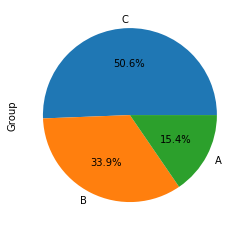

In [7]:
# Analysing data group value
data.Group.value_counts().plot(kind="pie",autopct="%1.1f%%")

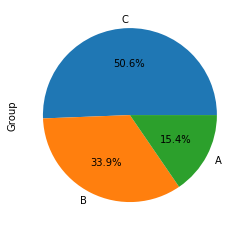

In [7]:
data['Group'].value_counts().plot(kind='pie',autopct='%1.1f%%')

It can be seen that only 15.4 % are grouped as top performer and 33.9% in the middle ad 50.6 as lowest category

### STEN being an abbreviation for 'Standard Ten'

* A STEN of 1 or 2 is far below average,
* A STEN of 5-7 is average,
* A STEN of 9 or 10 is far above average.


source : https://www.statisticshowto.datasciencecentral.com/sten-score/

In [7]:
# Analysing STEN
data.STEN.value_counts()

6     1661
5     1440
7     1235
4     1126
8     1065
3      711
10     659
9      406
2      263
1       99
Name: STEN, dtype: int64

In [8]:
# Analysing STEN
data.STEN.value_counts(ascending=False)*100/len(data)

6     19.169071
5     16.618580
7     14.252741
4     12.994807
8     12.290825
3      8.205424
10     7.605309
9      4.685516
2      3.035199
1      1.142527
Name: STEN, dtype: float64

* It can be inferred that there around **75%** of employees having rating between **4 to 8.**
* It can be seen that aroung 19.16% of employess got rating 6
* There are around 16.61% of files got rating 5 followed by rating 7
* It can be inferred that there around 75% 9f employees having rating between 4 to 8.

* 7% of employees got 10 rating anf 1.14% of employees got rating 1

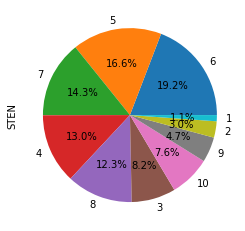

In [9]:
data.STEN.value_counts().plot(kind="pie",autopct="%1.1f%%")

In [10]:
data.MainScoreType.value_counts()

STEN          4240
Percentage    3499
Percentile     926
Name: MainScoreType, dtype: int64

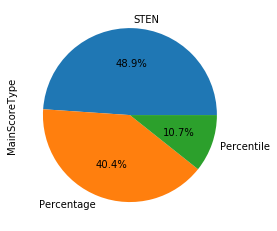

In [11]:
data.MainScoreType.value_counts().plot(kind="pie",autopct="%1.1f%%")

In [12]:
pd.crosstab(data.STEN,data.Group)

Group,A,B,C
STEN,,,
1,5,39,54
2,34,89,139
3,102,237,369
4,177,369,556
5,185,488,743
6,261,515,861
7,193,407,617
8,171,377,500
9,68,148,182


In [13]:
data.Area.value_counts()

Social Cohesion       4240
Bespoke               1168
Behaviour             1075
Career                 924
Cognitive              670
ABI India Measures     368
Emotional               92
Health                  85
Skills                  29
Feedback                14
Name: Area, dtype: int64

In [14]:
pd.crosstab(data.Area,data.Group)

Group,A,B,C
Area,,,
ABI India Measures,20,60,288
Behaviour,155,352,551
Bespoke,198,390,561
Career,180,342,390
Cognitive,104,222,331
Emotional,14,27,49
Feedback,0,0,14
Health,13,27,44
Skills,3,6,20


IT can be seen from here about various Area where the employees are being measured are grouped

In [15]:
data.Dimension.value_counts()

Culture                   1166
Emotional Stability        848
Extraversion               848
Conscientiousness          848
Openness                   848
Agreeableness              727
Work Values                648
Prediction Strategy        470
Control Strategy           470
ABI India Culture Fit      368
Executive Function         356
Career Skills              216
Risk Taking                125
Attention                  123
Resilience                 121
Speed & Agility             97
Memory                      94
Emotional Intelligence      91
Personal Wellbeing          85
Interests                   60
Language                    22
Workforce Intelligence      14
Entrepreneurship            10
Numeracy                     7
User Experience              2
Social Competence            1
Name: Dimension, dtype: int64

In [16]:
data.Attribute.value_counts()

Grow Talent                   129
Inspire and Motivate          129
Demonstrate Resilience        129
Think next big opportunity    129
Drive Execution               129
                             ... 
Trust in Leadership             2
Positive Environment            2
Hands on Management             2
Controlled Reaction Time        1
Intellectual Humility           1
Name: Attribute, Length: 152, dtype: int64

In [17]:
data.Assessment.head()

0    VentureView
1    VentureView
2    VentureView
3    VentureView
4    VentureView
Name: Assessment, dtype: object

In [18]:
data.AssessmentVersion.head()

0    Venture View V1
1    Venture View V1
2    Venture View V1
3    Venture View V1
4    Venture View V1
Name: AssessmentVersion, dtype: object

It can be seen that Assesment and AssesmentVersion are same just that there are come version

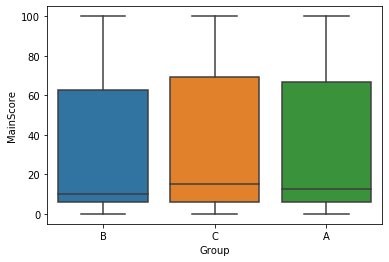

In [19]:
sns.boxplot(x=data.Group,y=data.MainScore)

It can be seen that there is not major change between Group and Main Score

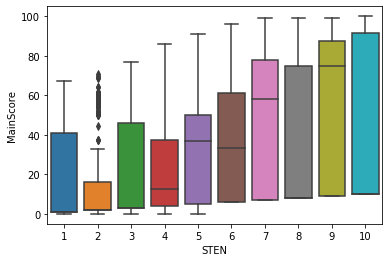

In [20]:
sns.boxplot(x=data.STEN,y=data.MainScore)

In [21]:
data.groupby("Group").MainScore.mean()

Group
A    34.918550
B    32.404675
C    35.971350
Name: MainScore, dtype: float64

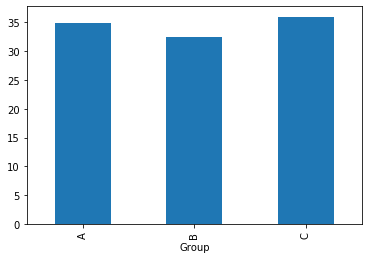

In [22]:
data.groupby("Group").MainScore.mean().plot(kind="bar")

In [23]:
data.groupby("Group").MainScore.median()

Group
A    12.5
B    10.0
C    15.0
Name: MainScore, dtype: float64

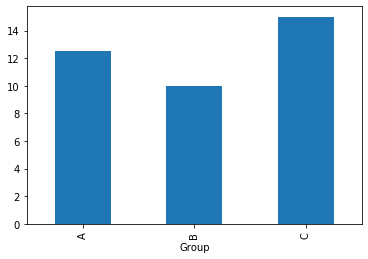

In [24]:
data.groupby("Group").MainScore.median().plot(kind="bar")

In [25]:
# STEN aned Percentile
data.groupby("STEN").Percentile.agg(["max","min"])

,max,min
STEN,,
1,2,0
2,6,3
3,15,7
4,30,16
5,49,31
6,69,50
7,84,70
8,93,85
9,97,94


It can be seen that Percentile and Sten are realted. So can remove the Percentile value. Can find the maximum and minimum value of percentile for each STEN is found


## Summary

The model score is being calculated based on Area,Dimension,Attribute,Assessment. From the main score type The percentile, percentage and STEN the Group also be found.

The percentage, Percentile and Main score are related.


Most importnat factor is STEN , AREA , Dimension and main score . Using these the group can be determined.

* It can be inferred that there around **75%** of employees having rating between **4 to 8.**
* It can be seen that aroung 19.16% of employess got rating 6
* There are around 16.61% of files got rating 5 followed by rating 7
* It can be inferred that there around 75% of employees having rating between 4 to 8.

* 7% of employees got 10 rating anf 1.14% of employees got rating 1

### Q2
If possible, build a predictive model of the performance ratings using Cognisess scores. The client may want to use such a model in their recruitment process. Produce a summary of your modelling process and any resulting models

In [26]:
# Replacing strings with numbers for Data Analysis
data.Group[data.Group == 'A'] = 1
data.Group[data.Group == 'B'] = 2
data.Group[data.Group == 'C'] = 3

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [27]:
data.head()

,AccountId,Area,Dimension,Attribute,Assessment,AssessmentVersion,MainScore,MainScoreType,Percentile,Percentage,STEN,Group
0,0,Behaviour,Control Strategy,Control,VentureView,Venture View V1,60.27,Percentage,7,60.27,3,2
1,0,Behaviour,Control Strategy,Control (Scenario1),VentureView,Venture View V1,67.86,Percentage,22,67.86,4,2
2,0,Behaviour,Control Strategy,Control (Scenario2),VentureView,Venture View V1,62.50,Percentage,27,62.50,4,2
3,0,Behaviour,Control Strategy,Control (Scenario3),VentureView,Venture View V1,55.36,Percentage,7,55.36,3,2
4,0,Behaviour,Control Strategy,Control (Scenario4),VentureView,Venture View V1,55.36,Percentage,4,55.36,2,2


In [28]:
# There are 134 records with NULL
data.Group.isna().sum()

134

In [29]:
data["AccountId"][data.Group.isna()].unique()

array([ 94, 154], dtype=int64)

The account id 94 and 154 does not any group. So it can be precited

In [30]:
# creating a data copy
data_new= data

In [31]:
data_new.columns

Index(['AccountId', 'Area', 'Dimension', 'Attribute', 'Assessment',
       'AssessmentVersion', 'MainScore', 'MainScoreType', 'Percentile',
       'Percentage', 'STEN', 'Group'],
      dtype='object')

In [32]:
# Columns to be dropped
columns=['AccountId','AssessmentVersion']

In [33]:
data_new=data_new.drop(columns, axis=1)

In [34]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the data_new

data_new = dummies("Area",data_new)
data_new = dummies('Dimension',data_new)
data_new = dummies("MainScoreType",data_new)
data_new = dummies("Attribute",data_new)
data_new = dummies("Assessment",data_new)

In [35]:
data_new.head()

,MainScore,Percentile,Percentage,STEN,Group,Behaviour,Bespoke,Career,Cognitive,Emotional,...,ShapeShifter,SpeedBall,SpeedTrap,SpeedWay,The Lens Pro,The Lens Student,VentureView,WordMatch,WordRight,Ziggurat
0,60.27,7,60.27,3,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,67.86,22,67.86,4,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,62.50,27,62.50,4,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,55.36,7,55.36,3,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,55.36,4,55.36,2,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
data_new.dropna(inplace=True)

In [37]:
# Splitting into  x and y
x= data_new.drop("Group",axis=1)
y=data_new[["Group"]]
y=y.astype('int')

In [38]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [39]:
x_train.head()

,MainScore,Percentile,Percentage,STEN,Behaviour,Bespoke,Career,Cognitive,Emotional,Feedback,...,ShapeShifter,SpeedBall,SpeedTrap,SpeedWay,The Lens Pro,The Lens Student,VentureView,WordMatch,WordRight,Ziggurat
4636,6.0,54,71.00,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
783,6.0,59,71.43,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6633,8.0,90,85.71,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
386,10.0,99,95.24,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1290,10.0,100,100.00,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.7110199296600235
0.44932630345635616


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5186107854630715
0.5038078500292912


### Model Summary

It can be seen that there model can be build using decision tree and Logistic Regression . The decision tree gives better results as accuracy is high in the decision tree. This can be used for prediction of future. But in reality we go for logistic.
